In [26]:
%matplotlib notebook

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:

housing_data = "master_data.csv"
housing_df = pd.read_csv(housing_data)


/Users/jasongwak/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
housing_df=housing_df[["ClientId", "Housing Status", "Visits"]]

In [5]:
# this line inlcudes "core services"
# master_df=master_df[["ClientId", "Housing Status", "Core Services", "Visits"]]

In [6]:
housing_df.head()

,ClientId,Housing Status,Visits
0,1,Temporary,6.0
1,1,Temporary,22.0
2,1,Temporary,6.0
3,1,Temporary,22.0
4,1,Temporary,6.0


In [22]:
housing_df.drop_duplicates(inplace=True)
housing_df.head()

,ClientId,Housing Status,Visits
0,1,Temporary,6.0
1,1,Temporary,22.0
12,2,Stable/permanent,2.0
20,3,Stable/permanent,11.0
23,3,Stable/permanent,1.0


In [8]:
total_visits = housing_df.groupby(['ClientId']).sum()
total_visits.head()

,Visits
ClientId,
1,28.0
2,2.0
3,12.0
4,3.0
5,45.0


In [9]:
# this is a new table with clientid, housing status, and total visits
merged_housing = pd.merge(total_visits, housing_df[['ClientId', 'Housing Status']], on='ClientId').drop_duplicates()
merged_housing.head()



,ClientId,Visits,Housing Status
0,1,28.0,Temporary
2,2,2.0,Stable/permanent
3,3,12.0,Stable/permanent
5,4,3.0,Stable/permanent
6,5,45.0,Stable/permanent


In [43]:
merged_housing.sum()

ClientId                                                   11493615
Visits                                                        35430
Housing Status    TemporaryStable/permanentStable/permanentStabl...
dtype: object

In [34]:
grouped = merged_housing.groupby('Housing Status').count() #series[]
# grouped.loc['Temporary', 'Visits']
grouped

,ClientId,Visits
Housing Status,,
Stable/permanent,4019,4019
Temporary,540,540
Unstable,235,235


In [11]:
total_clients = len(total_visits)
total_clients

4794

In [39]:
# Labels for the sections of our pie chart
labels = ["Temp", "Stable/Perm", "Unstable"]

# The values of each section of the pie chart
sizes = [540, 4019 , 235]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

<IPython.core.display.Javascript object>


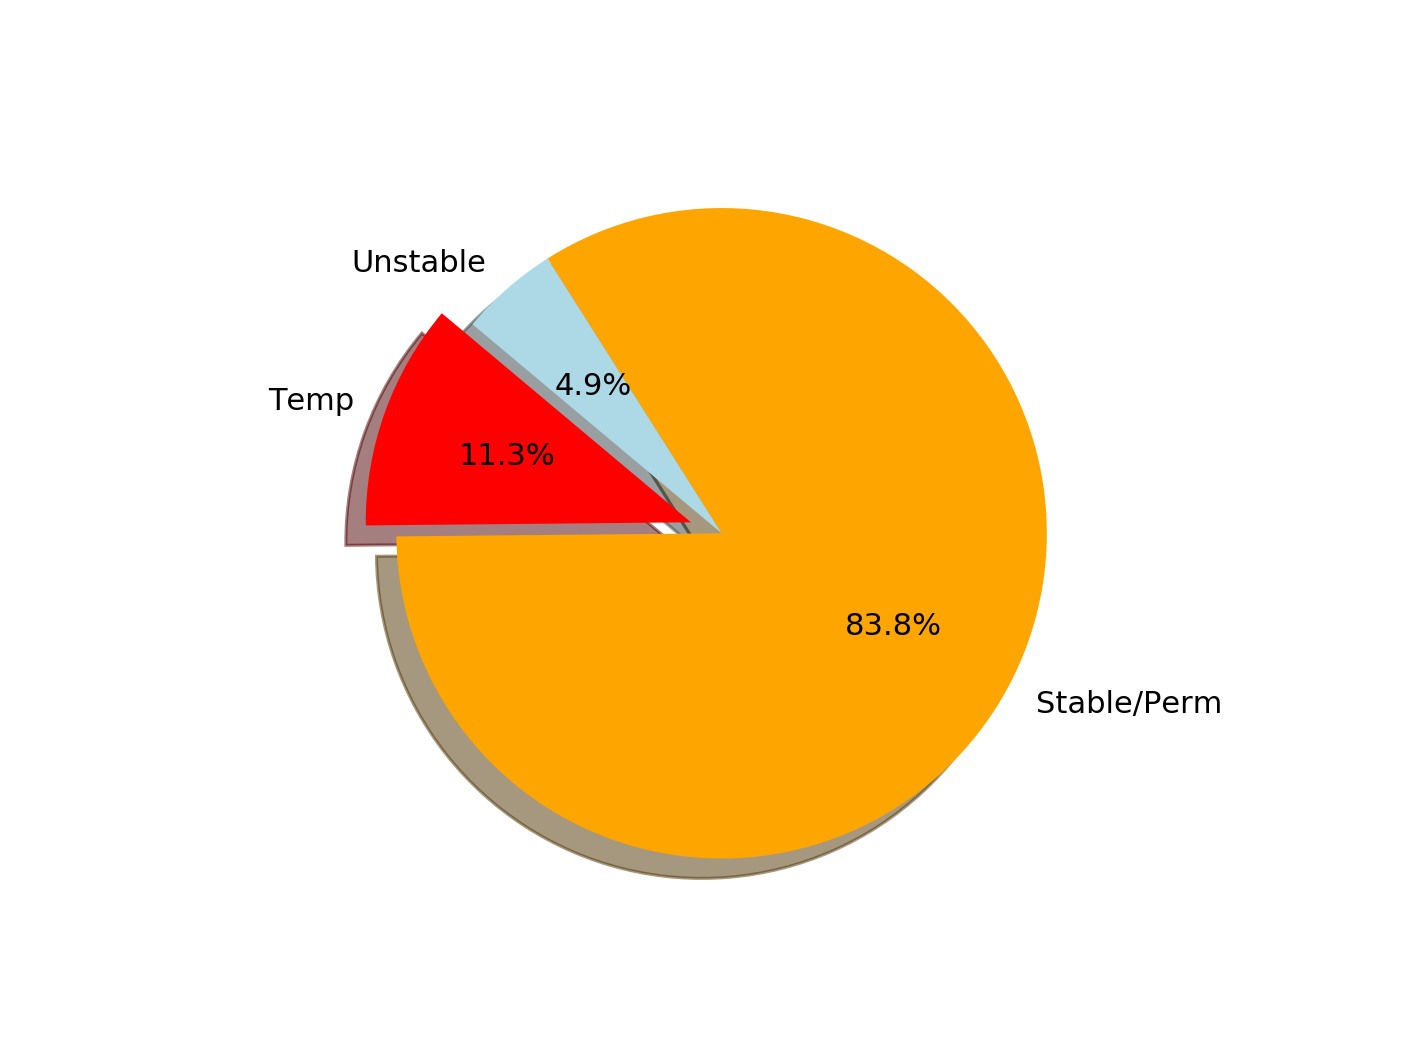

([<matplotlib.patches.Wedge at 0x122e199e8>,
 [Text(-1.129590472757805, 0.4050004492032063, 'Temp'),
  Text(0.9662570181114621, -0.5256875259603806, 'Stable/Perm'),
  Text(-0.7242183171954245, 0.8279540017649698, 'Unstable')],
 [Text(-0.6589277757753862, 0.2362502620352037, '11.3%'),
  Text(0.5270492826062521, -0.28673865052384395, '83.8%'),
  Text(-0.3950281730156861, 0.4516112736899835, '4.9%')])

In [40]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

In [14]:
# plt.pie(housing_percent, explode=explode, labels=labels, colors=colors,
#         autopct="%1.1f%%", shadow=True, startangle=140)

# # plt.pie(housing, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=0)
# # Create axes which are equal so we have a perfect circle
# plt.axis("equal")
# # Save an image of our chart and print the final product to the screen
# # plt.savefig("../Images/PyPies.png")
# plt.show()

In [16]:
# users = [13000, 26000, 52000, 30000, 9000]
# x_axis = np.arange(len(users))

In [17]:
# # Tell matplotlib that we will be making a bar chart
# # Users is our y axis and x_axis is, of course, our x axis
# # We apply align="edge" to ensure our bars line up with our tick marks
# plt.bar(x_axis, users, color='r', alpha=0.5, align="center")

In [18]:
# # Tell matplotlib where we would like to place each of our x axis headers
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, ["Java", "C++", "Python", "Ruby", "Clojure"])

In [19]:
# # Sets the x limits of the current chart
# plt.xlim(-0.75, len(x_axis)-0.25)

In [20]:
# Sets the y limits of the current chart
# plt.ylim(0, max(users)+5000)

In [21]:
# # Give our chart some labels and a tile
# plt.title("Popularity of Programming Languages")
# plt.xlabel("Programming Language")
# plt.ylabel("Number of People Using Programming Languages")